# Data description

The dataset we are using for analysis:
* Segmenting and Clustering Neighborhoods in New York City :https://codekarim.com/node/57
* NYPD Arrest Data: https://www.kaggle.com/datasets/thaddeussegura/nypd-arrest-data-20062019
* NYC Airbnb Data: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
* NYC property Sales: https://www.kaggle.com/datasets/johnshuford/new-york-city-property-sales
* NYC motor vehicle collision: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

## Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
from  matplotlib import cm
import json
import os
import requests
from pandas.io.json import json_normalize
import glob

In [2]:
crimeData = pd.read_csv("Data/NYPD_Arrests_Data__Historic_.csv").dropna()
collisionData = pd.read_csv("Data/Motor_Vehicle_Collisions_-_Crashes.csv")
airbnbData = pd.read_csv("Data/AB_NYC_2019.csv").dropna()

C:\Users\i\anaconda3\envs\is545\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### variables in the crime data

In [3]:
print (crimeData.dtypes)

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object


### variables in the collision data

In [4]:
print (collisionData.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

### variables in the airbnb data

In [5]:
print (airbnbData.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## Show crime distribution from NYPD in pie chart

In [6]:
def plotPieChart(data,label,title):
    fig, axes = plt.subplots(figsize=(15,15),ncols=2)
    ax1, ax2 = axes.ravel()

    colors = cm.rainbow(np.arange(len(data))/len(data))# colormaps: Paired, autumn, rainbow, gray,spring,Darks
    patches, texts, autotexts = ax1.pie(data, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=170, colors=colors)

    ax1.axis('equal')  
    
    proptease = fm.FontProperties()
    proptease.set_size('xx-small')
    # font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    ax1.set_title(title, loc='center')
    ax2.axis('off')
    ax2.legend(patches, labels, loc='center left')

    plt.tight_layout()
    plt.savefig('Demo_project_set_legend_good.jpg')
    plt.show()

In [7]:
crimeData.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
3,189714430,11/07/2018,117.0,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,M,26,0.0,45-64,M,WHITE,993685.0,233346.0,40.807160,-73.965920,POINT (-73.96591978699998 40.80715993100006)
5,190017529,11/15/2018,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0.0,45-64,M,BLACK,1026486.0,262591.0,40.887333,-73.847250,POINT (-73.84725001299995 40.88733281800006)
10,189678705,11/07/2018,175.0,"SEXUAL ABUSE 3,2",233.0,SEX CRIMES,PL 13052A1,M,B,52,0.0,25-44,M,BLACK,1017542.0,255919.0,40.869059,-73.879630,POINT (-73.87963014799993 40.86905853200005)
14,189068425,10/22/2018,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,94,0.0,45-64,M,BLACK,995886.0,200705.0,40.717566,-73.958026,POINT (-73.95802570099994 40.71756616100004)
15,65864442,09/17/2009,164.0,SODOMY 3,116.0,SEX CRIMES,PL 1304002,F,S,122,0.0,25-44,M,BLACK HISPANIC,954943.0,148360.0,40.573850,-74.105496,POINT (-74.10549615599997 40.573849649000074)


Let's take a look a the distrubation of crime type and where they happend

In [8]:
typeCount = crimeData['OFNS_DESC']
typeCount = typeCount.value_counts(sort=True)
labels =typeCount.index
number = np.array(typeCount)

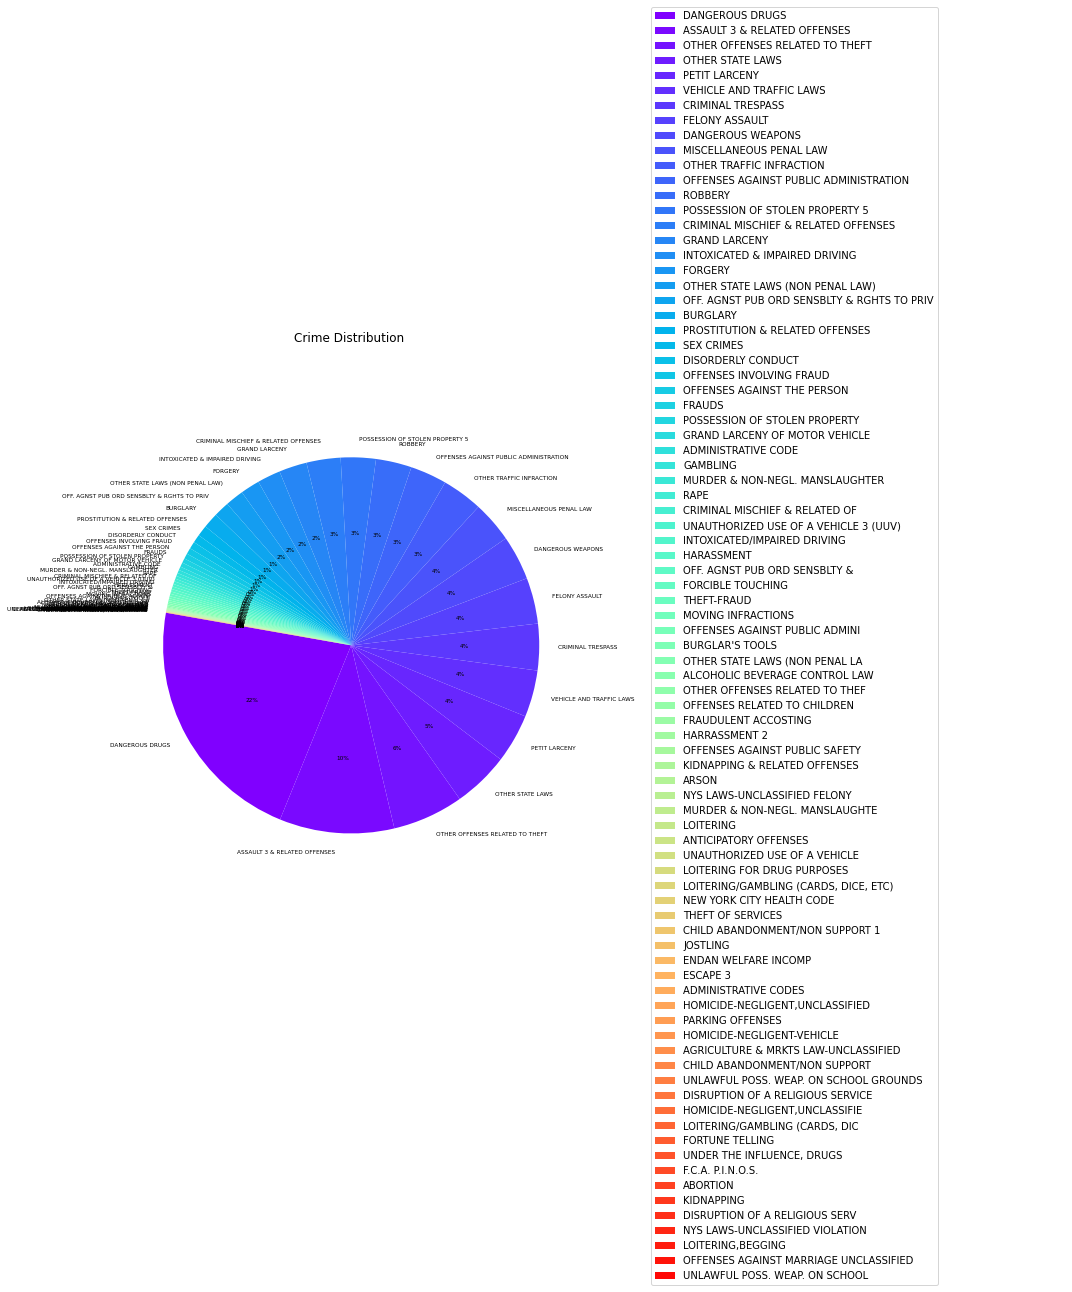

In [9]:
plotPieChart(number,labels, "Crime Distribution")

Then, let's take a look a how these arrests distribute amoung boroughs.

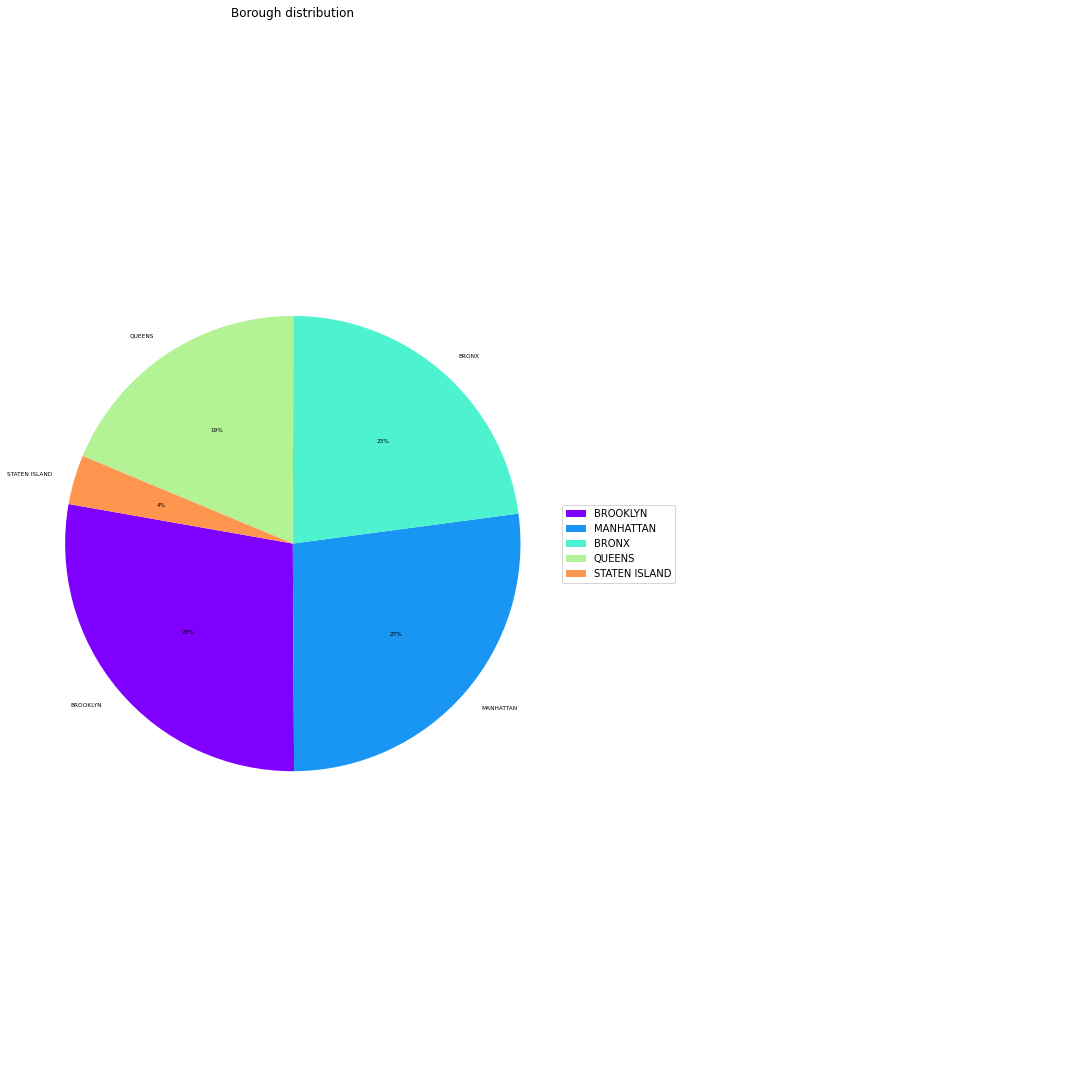

In [10]:
typeBorough = crimeData['ARREST_BORO']
typeBorough = typeBorough.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
typeCountB = typeBorough.value_counts()
labels = typeCountB.index
numberB = np.array(typeCountB)
plotPieChart(typeCountB,labels,"Borough distribution")

Based on previous pie chart, we select severl crime that happens alot and might affect house rent and sale prices.
There Assault, theft, and trespassing. We check these types of crime separatly in different borough.

In [11]:
crimeGivenBorough = crimeData[['OFNS_DESC','ARREST_BORO']]

In [12]:
assult = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']
theft = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='OTHER OFFENSES RELATED TO THEFT']
threspassing = crimeGivenBorough.loc[crimeGivenBorough['OFNS_DESC']=='CRIMINAL TRESPASS']

Lets plot them out

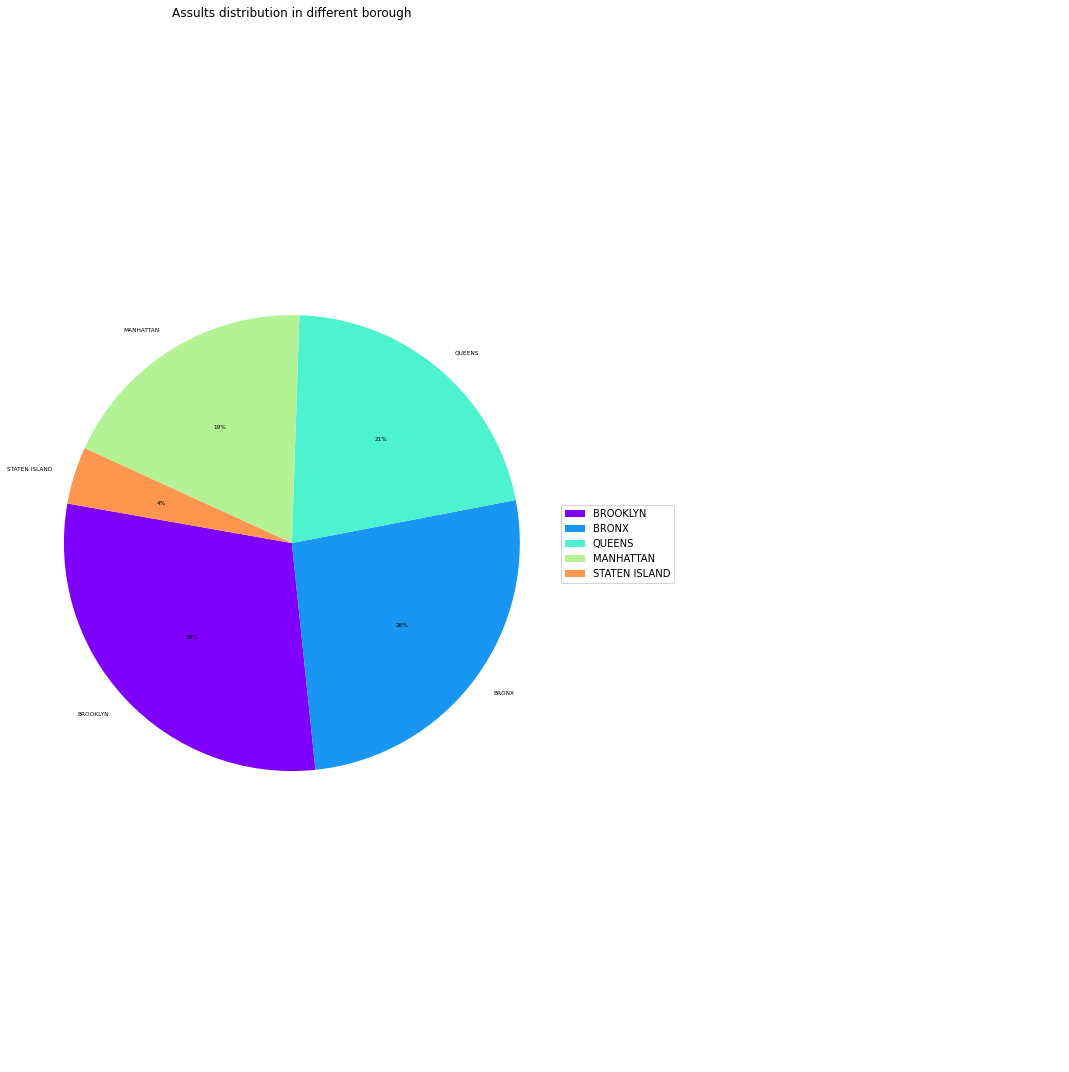

In [13]:
data = assult['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Assults distribution in different borough")

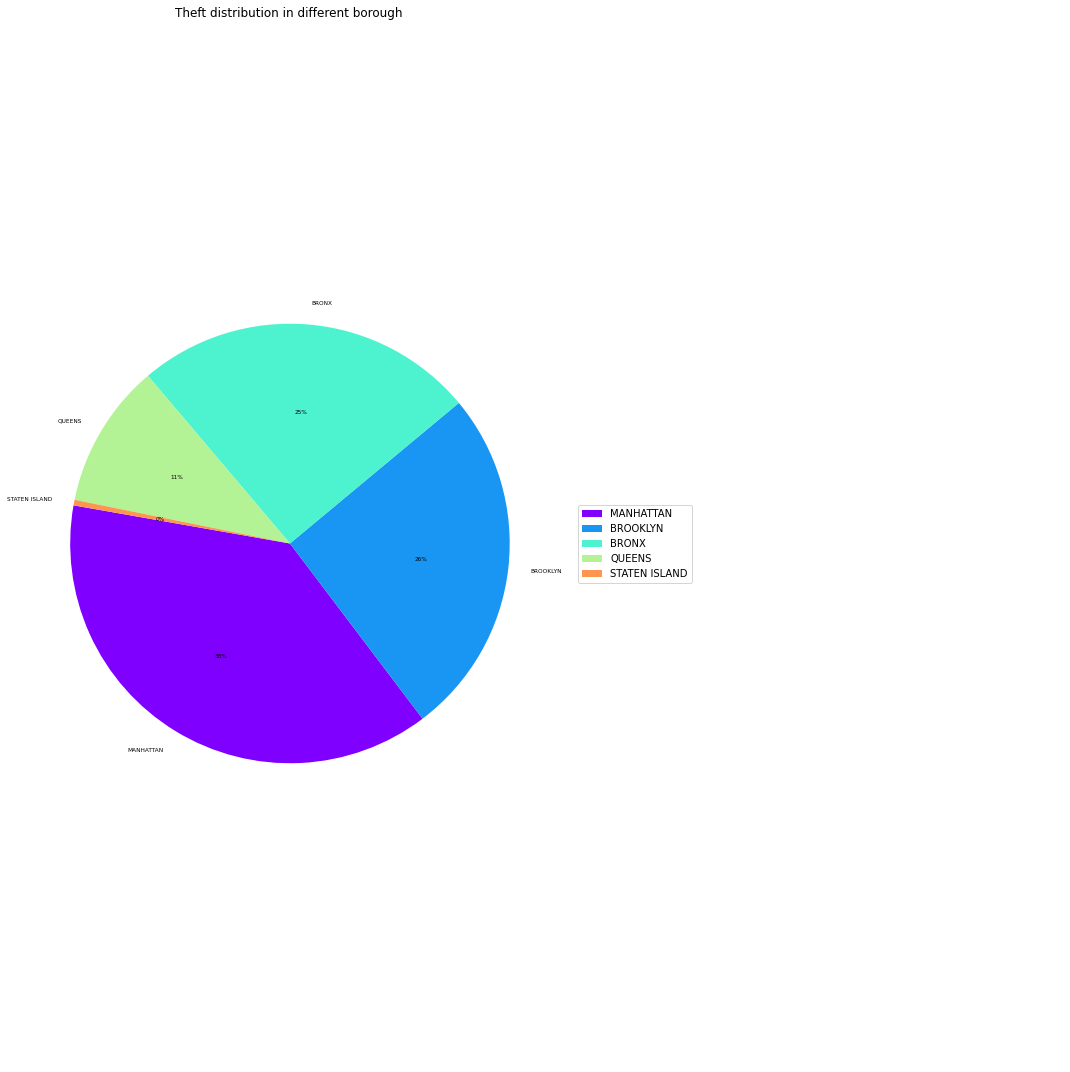

In [14]:
data = theft['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Theft distribution in different borough")

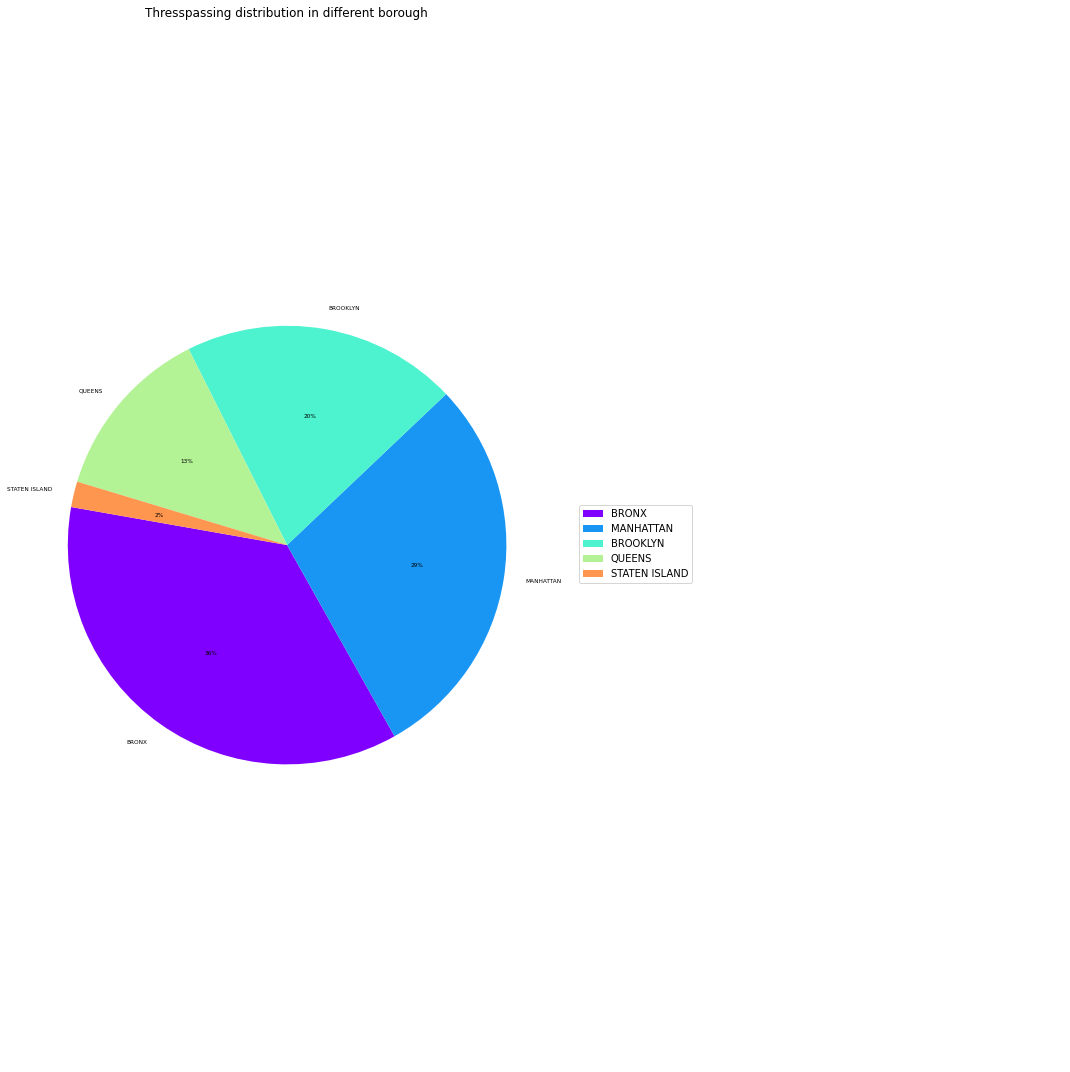

In [15]:
data = threspassing['ARREST_BORO']
data = data.replace(['K','Q','M','B','S'], ['BROOKLYN', 'QUEENS', 'MANHATTAN', 'BRONX', 'STATEN ISLAND'])
data = data.value_counts()
labels = data.index
plotPieChart(data,labels,"Thresspassing distribution in different borough")

Lets now have a view of collision data and how these collision distributed among boroughs

In [16]:
collisionData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


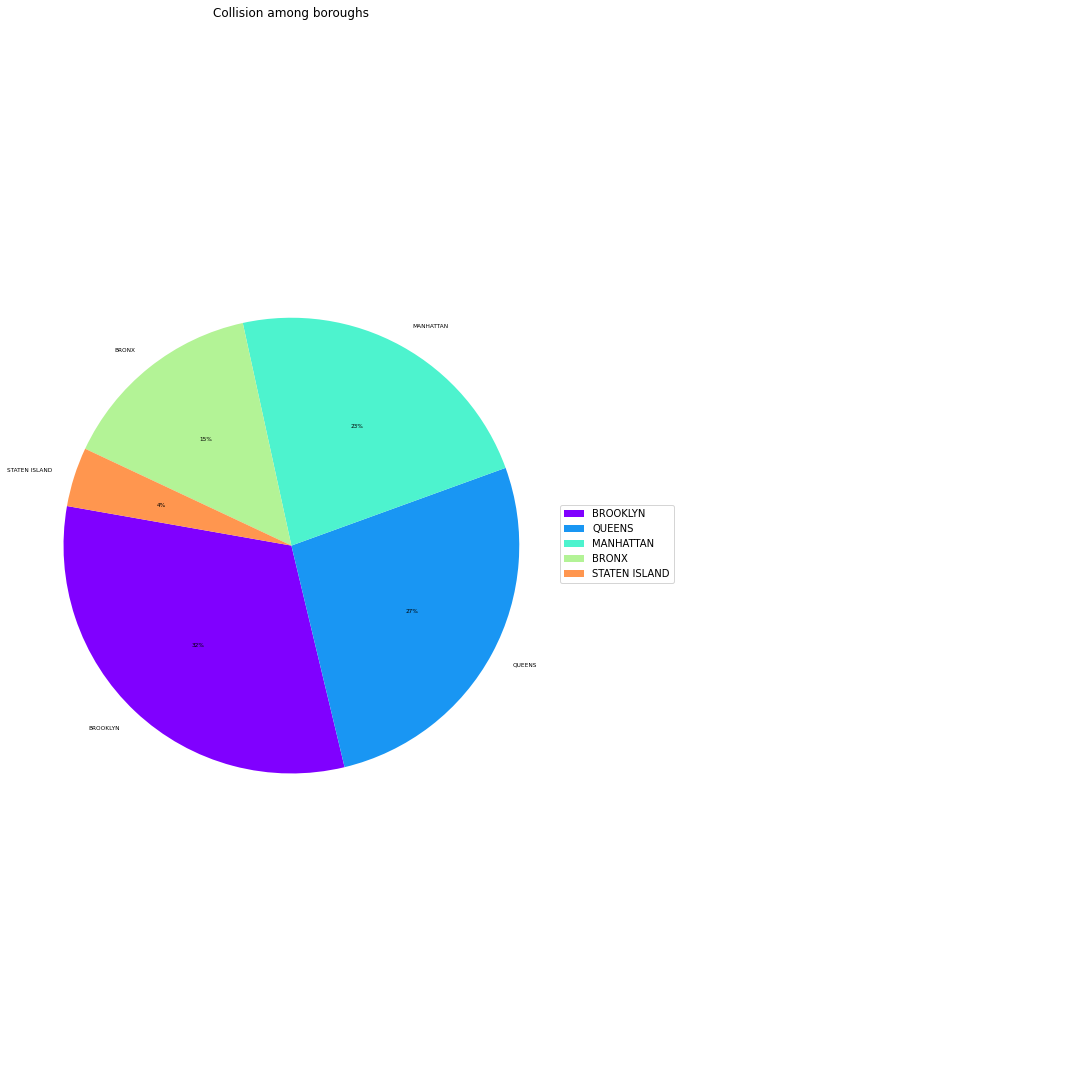

In [17]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

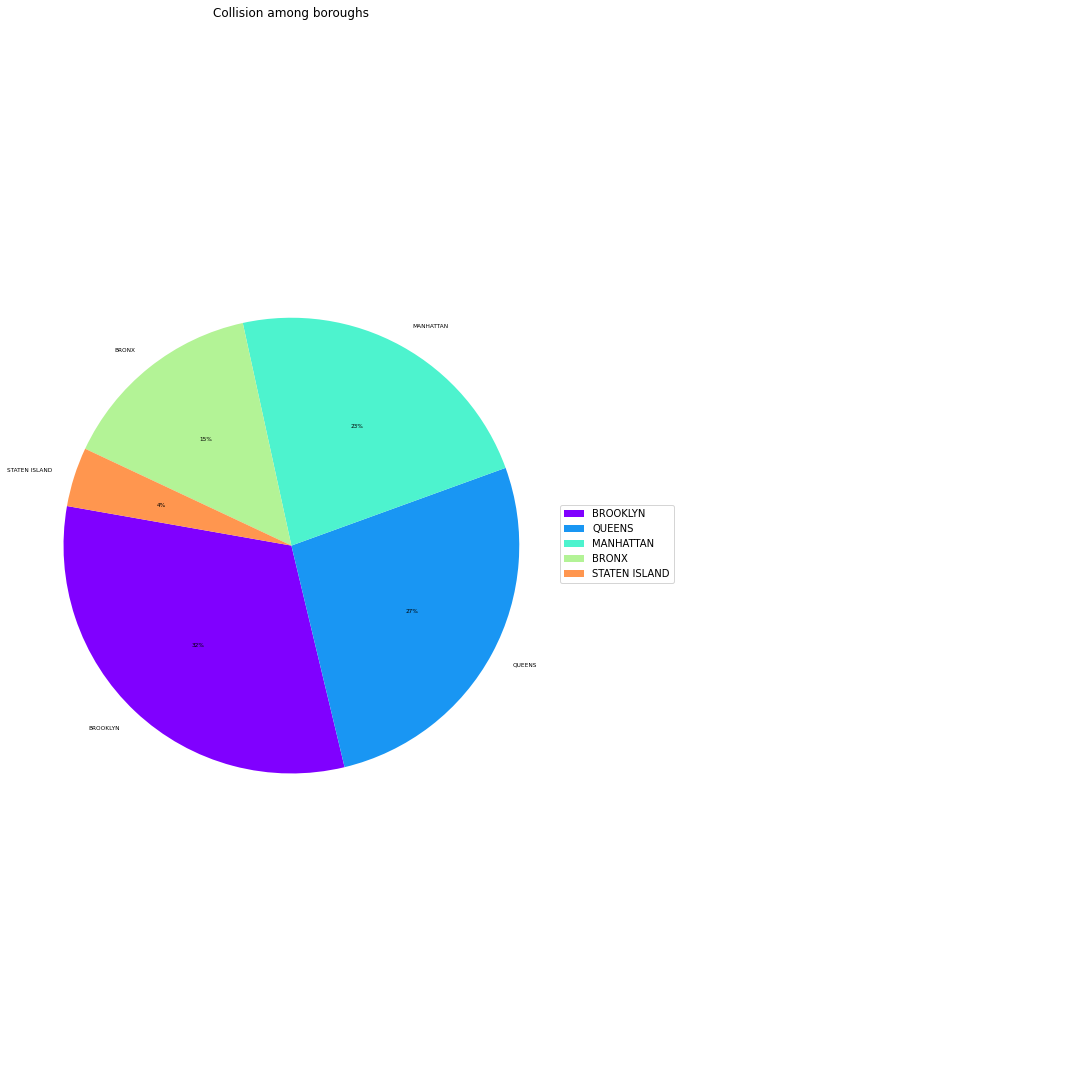

In [18]:
collisionBorough = collisionData['BOROUGH']
collisionBorough = collisionBorough.value_counts()
labels = collisionBorough.index
plotPieChart(collisionBorough,labels,"Collision among boroughs")

In [19]:
collisionVehicle = collisionData['VEHICLE TYPE CODE 1']
collisionVehicle = collisionVehicle.value_counts();
collisionVehicle.head()

Sedan                                  484651
PASSENGER VEHICLE                      416206
Station Wagon/Sport Utility Vehicle    384588
SPORT UTILITY / STATION WAGON          180291
Taxi                                    46337
Name: VEHICLE TYPE CODE 1, dtype: int64

Here we try to analyze the different car type of collision in different boroughs.

In [20]:
# this function extract exact number of collision in sedan,suv,taxi,and pick up truck in given borough.
def getBoroughDistribution(cityName,collisionData):
    borough = collisionData.loc[collisionData['BOROUGH']== cityName]
    borough = borough[borough['VEHICLE TYPE CODE 1'].notna()]
    borough['VEHICLE TYPE CODE 1'] = borough['VEHICLE TYPE CODE 1'].str.lower()
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan'), 'VEHICLE TYPE CODE 1'] = 'sedan'
    borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('Sport'), 'VEHICLE TYPE CODE 1'] = 'SUV'
    sedanNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sedan')==True])
    pickUpNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('pick')==True])
    taxiNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('taxi')==True])
    SUVNum = len(borough.loc[borough['VEHICLE TYPE CODE 1'].str.contains('sport')==True])
    return [sedanNum,pickUpNum,taxiNum,SUVNum]

In [21]:
brooklyn = getBoroughDistribution('BROOKLYN',collisionData)
queens = getBoroughDistribution('QUEENS',collisionData)
bronx = getBoroughDistribution('BRONX',collisionData)
island = getBoroughDistribution('STATEN ISLAND',collisionData)
manhattan = getBoroughDistribution('MANHATTAN',collisionData)

In [22]:
columns = ["Sedan","Pick-up Truck", "Taxi","SUV"]
index = ['BROOKLYN','QUEENS','BRONX','STATEN ISLAND','MANHATTAN']
frames = [brooklyn,queens,bronx,island,manhattan]
frames = pd.DataFrame(frames,index = index,columns = columns)
frames

,Sedan,Pick-up Truck,Taxi,SUV
BROOKLYN,113606,7907,6865,124981
QUEENS,95596,7138,5399,115053
BRONX,56952,3597,4860,53539
STATEN ISLAND,15783,1564,80,16364
MANHATTAN,57199,7549,41429,67873


In [23]:
frames.reset_index(inplace=True)
frames = frames.rename(columns = {'index':'Borough'})
frames

,Borough,Sedan,Pick-up Truck,Taxi,SUV
0,BROOKLYN,113606,7907,6865,124981
1,QUEENS,95596,7138,5399,115053
2,BRONX,56952,3597,4860,53539
3,STATEN ISLAND,15783,1564,80,16364
4,MANHATTAN,57199,7549,41429,67873


<AxesSubplot:xlabel='Borough'>

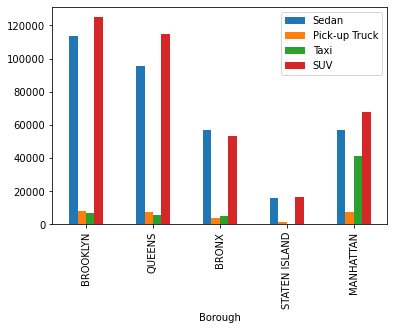

In [24]:
frames.plot(x='Borough',y=["Sedan","Pick-up Truck","Taxi","SUV"],kind ='bar')

In [25]:
airbnbData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [26]:
avgData = airbnbData.groupby('neighbourhood_group')['price'].mean()
labels = avgData.index
labels

Index(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='neighbourhood_group')

And let's plot out the average price of airbnb rent price in each borough.

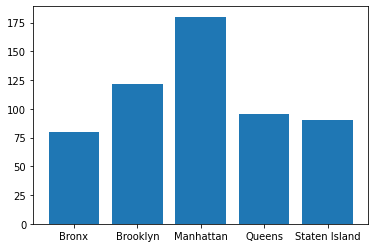

In [27]:
plt.bar(labels, avgData)
plt.show()

# Explore New York neighborhood data
Download and open json file from https://cocl.us/new_york_dataset

In [28]:
with open('data/nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [29]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

Load json data into Pandas DataFrame

In [30]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough.upper(),
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,BRONX,Wakefield,40.894705,-73.847201
1,BRONX,Co-op City,40.874294,-73.829939
2,BRONX,Eastchester,40.887556,-73.827806
3,BRONX,Fieldston,40.895437,-73.905643
4,BRONX,Riverdale,40.890834,-73.912585
...,...,...,...,...
301,MANHATTAN,Hudson Yards,40.756658,-74.000111
302,QUEENS,Hammels,40.587338,-73.805530
303,QUEENS,Bayswater,40.611322,-73.765968
304,QUEENS,Queensbridge,40.756091,-73.945631


Define a function that calculate the distance between a given point and neighborhoods

In [31]:
def get_neighborhood(location: tuple, borough: str) ->str:
    bor = neighborhoods.loc[neighborhoods.Borough == borough, ['Borough', 'Neighborhood', 'Latitude', 'Longitude']]
    bor['Distance'] = np.square(location[0] - bor['Latitude']) + np.square(location[1] - bor['Longitude'])
    min_index = bor['Distance'].idxmin()
    return bor.loc[min_index, 'Neighborhood']

In [32]:
get_neighborhood((40.895437, -73.905643), 'BRONX')

'Fieldston'

Select data between 2017 and 2019 and drop the lines which have no location information

In [33]:
collisionData = collisionData.dropna(subset=['BOROUGH', 'LATITUDE', 'LONGITUDE'], how='any')
collisionData['CRASH DATE'] = pd.to_datetime(collisionData['CRASH DATE'],format="%m/%d/%Y")
mask = (collisionData['CRASH DATE'] >= '2017-01-01') & (collisionData['CRASH DATE'] <= '2019-12-31')
collisionData_2017_2019 = collisionData.loc[mask].copy()
collisionData_2017_2019

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
13,2019-05-21,22:50,BROOKLYN,11201.0,40.697540,-73.983120,"(40.69754, -73.98312)",GOLD STREET,CONCORD STREET,NaN,...,Unspecified,NaN,NaN,NaN,4136992,�MBU,Taxi,NaN,NaN,NaN
161721,2017-02-19,16:10,BROOKLYN,11203.0,40.636981,-73.936543,"(40.6369807, -73.9365431)",FARRAGUT ROAD,EAST 42 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3618395,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
161722,2018-03-26,0:06,BROOKLYN,11203.0,40.637277,-73.931765,"(40.6372771, -73.9317652)",FARRAGUT ROAD,SCHENECTADY AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3869923,Sedan,Sedan,NaN,NaN,NaN
204678,2019-12-17,15:57,BRONX,10452.0,40.846096,-73.919190,"(40.846096, -73.91919)",FEATHERBED LANE,SHAKESPEARE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4259787,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
204680,2019-12-28,9:30,MANHATTAN,10021.0,40.767494,-73.959330,"(40.767494, -73.95933)",EAST 70 STREET,2 AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4266236,Sedan,Station Wagon/Sport Utility Vehicle,Box Truck,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921599,2017-01-07,19:30,QUEENS,11427.0,40.724160,-73.754974,"(40.72416, -73.754974)",HILLSIDE AVENUE,HOLLIS COURT BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,3593568,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
921600,2017-01-17,5:06,QUEENS,11422.0,40.659428,-73.732820,"(40.659428, -73.73282)",NaN,NaN,142-34 254 STREET,...,NaN,NaN,NaN,NaN,3599650,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
921601,2017-01-15,7:00,QUEENS,11373.0,40.745730,-73.886180,"(40.74573, -73.88618)",NaN,NaN,79-11 41 AVENUE,...,Unspecified,NaN,NaN,NaN,3598839,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
921604,2017-01-10,20:22,BROOKLYN,11229.0,40.594050,-73.958840,"(40.59405, -73.95884)",GRAVESEND NECK ROAD,SHEEPSHEAD BAY ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3596679,Box Truck,Van,NaN,NaN,NaN


In [34]:
#for index, row in collisionData_2017_2019.iterrows():
 #   location = (row['LATITUDE'],row['LONGITUDE'])
  #  nbh = get_neighborhood(location, row['BOROUGH'])
   # collisionData_2017_2019.loc[index,'NBH'] = nbh

In [35]:
#print(collisionData_2017_2019['NBH'])

## Get the neighborhood for crime

In [36]:
#crimeData

In [37]:
#crimeData['ARREST_DATE'] = pd.to_datetime(crimeData['ARREST_DATE'],format="%m/%d/%Y")
#mask = (crimeData['ARREST_DATE'] >= '2017-01-01') & (crimeData['ARREST_DATE'] <= '2019-12-31')
#crimeData_2017_2019 = crimeData.loc[mask].copy()
#crimeData_2017_2019

In [38]:
#print(crimeData['ARREST_BORO'].unique())

In [39]:
#print(neighborhoods['Borough'].unique())

"BORO_NM " represents the borough where suspects were arrested, which may differ from the borough where crime happened.

In [40]:
#def getNameforBorough(letter:str)->str:
 #   if letter == 'M':
  #      borough= 'MANHATTAN'
   # elif letter =='B':
    #    borough= 'BRONX'
    #elif letter == 'K':
    #    borough= 'BROOKLYN'
    #elif letter == 'S':
     #   borough= 'STATEN ISLAND'
    #else:
     #   borough = 'QUEENS'
    #return borough

In [41]:
#neighborhoods.loc[neighborhoods['Neighborhood'] == 'Morningside Heights']

In [42]:
#collisionData_2017_2019.to_csv('data/collisionData_2017_2019.csv', index=False)
#crimeData_2017_2019.to_csv('data/crimeData_2017_2019.csv', index=False)

NameError: name 'crimeData_2017_2019' is not defined

In [45]:
collisionData_NBH = pd.read_csv('Data/collisionData_2017_2019.csv')
crimeData_NBH = pd.read_csv('Data/crimeData_2017_2019.csv')

In [46]:
collisionData_NBH["NBH"]
crimeData_NBH["NBH"]

0         Morningside Heights
1                    Edenwald
2                Bedford Park
3                  North Side
4                  Mott Haven
                 ...         
741135             Ocean Hill
741136                Astoria
741137              Rossville
741138               Elmhurst
741139     Washington Heights
Name: NBH, Length: 741140, dtype: object

After we can find out which neighborhood a location is belong to, we now explore the sales data.

First we got our original data year to year in separate files of different borough. we need to merge it into one file first.

We use helper function from utils.py to process the data first and merge the data or each borough into one file

In [47]:
BronxData = pd.read_csv("Data/Bronx-mergeData.csv").dropna()
QueensData = pd.read_csv("Data/Queens-mergeData.csv").dropna()
BrooklynData = pd.read_csv("Data/Brooklyn-mergeData.csv").dropna()
ManhattanData = pd.read_csv("Data/Manhattan-mergeData.csv").dropna()
StatenIslandData = pd.read_csv("Data/StatenIsland-mergeData.csv").dropna()

C:\Users\i\anaconda3\envs\is545\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


For each Borough, we will find out the pick neighboor, we just pick from head and tail neighborhoods

In [48]:
def pickNeighborhood(BoroughData):
    neighborhoods = BoroughData["Neighborhood"].unique()
    afterAverage = BoroughData.groupby('Neighborhood').agg({'Unit Price':'mean'})
    afterAverage = afterAverage.sort_values("Unit Price",ascending = False)
    return afterAverage

Now we have the most expansive and inexpansive 

In [49]:
BronxData_selected = pickNeighborhood(BronxData)
QueensData_selected = pickNeighborhood(QueensData)
Brooklyn_selected = pickNeighborhood(BrooklynData)
Manhattan_selected = pickNeighborhood(ManhattanData)
StatenIsland_selected = pickNeighborhood(StatenIslandData)

In [90]:
def appendDataToBorough(selected_data,collisionDataSet,crimData):
    for index, row in selected_data.iterrows():
        selected_data.loc[index]
        collisions = collisionDataSet.loc[collisionDataSet["NBH"].str.upper()==index]
        crimes = crimData.loc[crimData["NBH"].str.upper()==index]
        collisionWithDeathNum = collisions.loc[collisions["NUMBER OF PERSONS KILLED"]>0].shape[0]
        collisionWithSedanNum = collisions.loc[collisions["VEHICLE TYPE CODE 1"].str.contains("Sedan")==True].shape[0]
        collisionWithSUVNum = collisions.loc[collisions["VEHICLE TYPE CODE 1"].str.contains("Sport")==True].shape[0]
        theftCrimeNum = crimes.loc[crimes["OFNS_DESC"].str.contains("THEFT")==True].shape[0]
        selected_data.loc[index,"collisionWithDeath"] = collisionWithDeathNum*100
        selected_data.loc[index,"collisionWithSedan"] = collisionWithSedanNum
        selected_data.loc[index,"collisionWithSUV"] = collisionWithSUVNum
        selected_data.loc[index,"theftCrime"] = theftCrimeNum
        selected_data.replace(0, np.nan, inplace=True)

In [91]:
appendDataToBorough(QueensData_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(BronxData_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(Brooklyn_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(Manhattan_selected,collisionData_NBH,crimeData_NBH)
appendDataToBorough(StatenIsland_selected,collisionData_NBH,crimeData_NBH)

In [92]:
QueensData_selected

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
LONG ISLAND CITY,1209.829274,100.0,659.0,557.0,41.0
REGO PARK,1125.000000,300.0,632.0,644.0,8.0
ASTORIA,1067.841377,100.0,938.0,847.0,64.0
FLUSHING-NORTH,921.080737,NaN,NaN,NaN,NaN
WOODSIDE,757.138079,400.0,1522.0,1248.0,90.0
...,...,...,...,...,...
GLEN OAKS,74.251391,NaN,NaN,NaN,NaN
JAMAICA BAY,68.750000,NaN,NaN,NaN,NaN
GLEN OAKS,0.124163,200.0,539.0,415.0,1.0


In [93]:
QueensFinal = QueensData_selected.dropna(how="any")
BronxFinal = BronxData_selected.dropna(how="any")
BrooklynFinal = Brooklyn_selected.dropna(how="any")
ManhattanFinal = Manhattan_selected.dropna(how="any")
StatenIslandFinal = StatenIsland_selected.dropna(how="any")

In [94]:
BronxFinal

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
BELMONT,1213.678508,200.0,840.0,644.0,32.0
FORDHAM,820.232584,200.0,1116.0,734.0,659.0
EAST TREMONT,474.790146,400.0,1192.0,931.0,302.0
SOUNDVIEW,335.281693,100.0,936.0,697.0,133.0
WILLIAMSBRIDGE,317.301046,200.0,881.0,595.0,90.0
WOODLAWN,105.682150,100.0,694.0,433.0,4.0


In [95]:
BrooklynFinal

,Unit Price,collisionWithDeath,collisionWithSedan,collisionWithSUV,theftCrime
Neighborhood,,,,,
BOERUM HILL,2392.003185,100.0,782.0,496.0,68.0
CLINTON HILL,2326.501771,100.0,696.0,629.0,95.0
GREENPOINT,1403.501381,300.0,949.0,898.0,15.0
BATH BEACH,1270.921244,500.0,912.0,795.0,53.0
SUNSET PARK,1173.327583,700.0,2074.0,1887.0,372.0
BENSONHURST,1092.599336,200.0,1181.0,1155.0,49.0
BUSHWICK,762.624205,300.0,2083.0,1524.0,332.0
CROWN HEIGHTS,757.559767,400.0,1390.0,630.0,58.0
DYKER HEIGHTS,684.042004,300.0,1369.0,742.0,4.0


<AxesSubplot:xlabel='Neighborhood'>

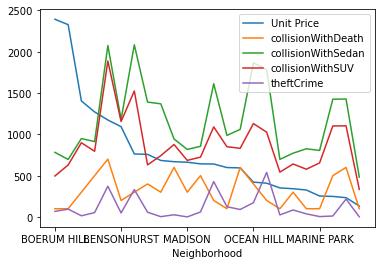

In [96]:
BrooklynFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

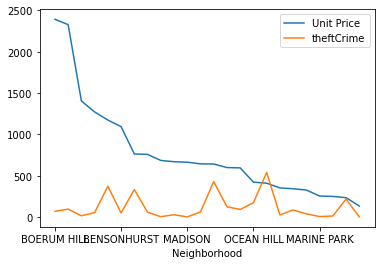

In [97]:
BrooklynFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

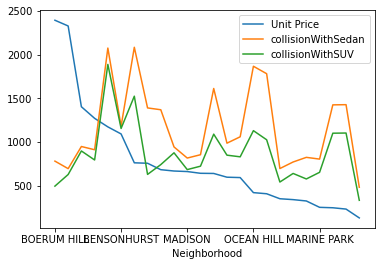

In [98]:
BrooklynFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

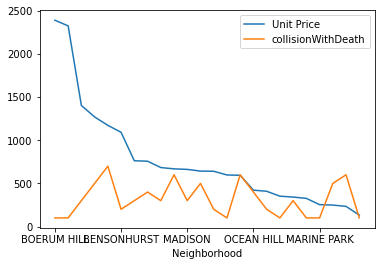

In [109]:
BrooklynFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

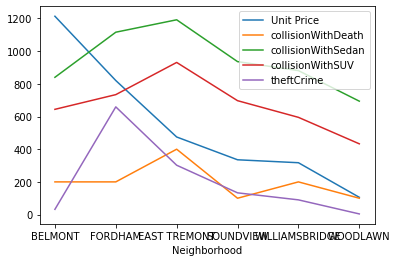

In [99]:
BronxFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

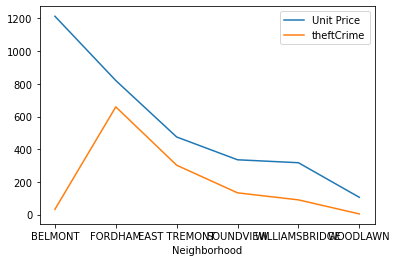

In [100]:
BronxFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

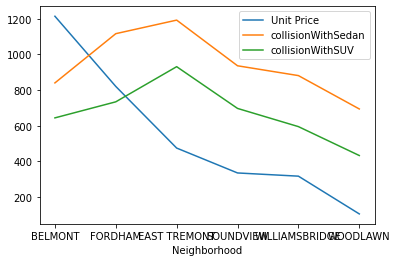

In [101]:
BronxFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

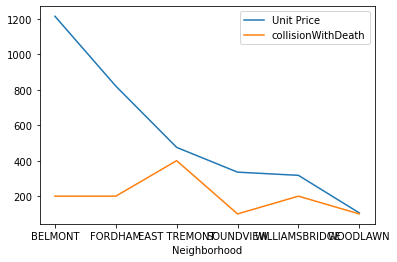

In [110]:
BronxFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

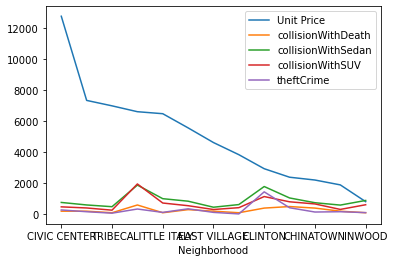

In [102]:
ManhattanFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

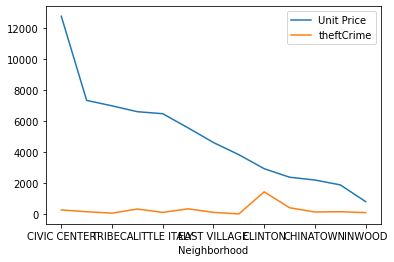

In [103]:
ManhattanFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

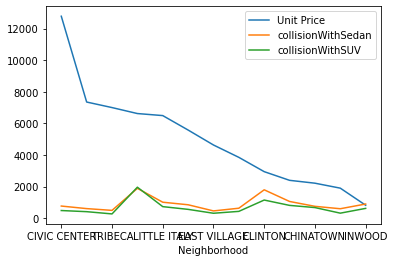

In [104]:
ManhattanFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

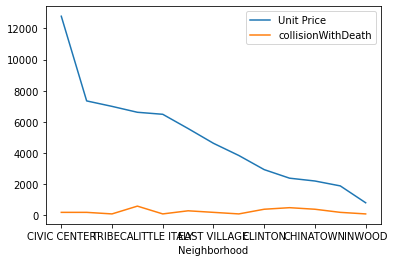

In [111]:
ManhattanFinal[["Unit Price","collisionWithDeath"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

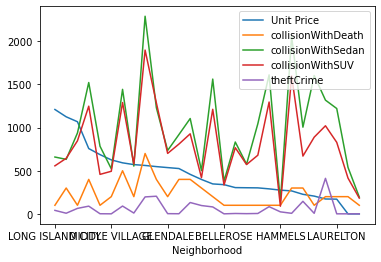

In [105]:
QueensFinal.plot()

<AxesSubplot:xlabel='Neighborhood'>

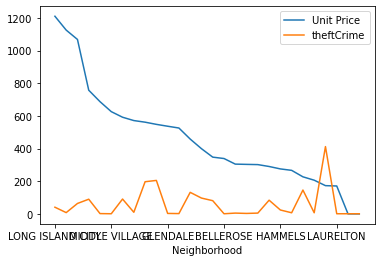

In [106]:
QueensFinal[["Unit Price","theftCrime"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

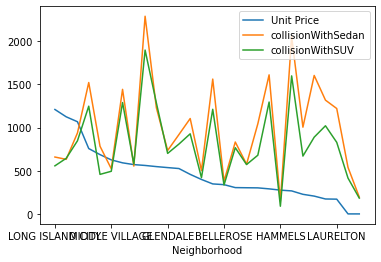

In [107]:
QueensFinal[["Unit Price","collisionWithSedan","collisionWithSUV"]].plot()

<AxesSubplot:xlabel='Neighborhood'>

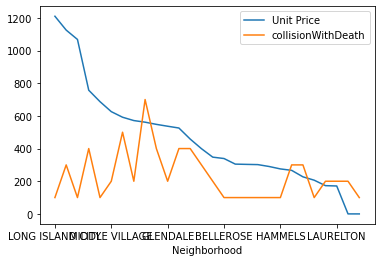

In [108]:
QueensFinal[["Unit Price","collisionWithDeath"]].plot()